# Supervised learning - Classification
Goal of the excercise is to learn how to use Scikit-learn library for a classification tasks using Decision tree, SVM and NN. Moreover evaluate the performance of the proposed models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

#### Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancĂ©s were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

- Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- Metrics https://scikit-learn.org/stable/modules/model_evaluation.html
- K-Fold CV https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold
- SVM https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Load the titanic.csv dataset
- We want to create a model that predicts if a certain passanger survives or not, thus **survival** is the class label in this case

In [2]:
df = pd.read_csv('./titanic.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## How many passangers survived?

In [3]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## We need to pre-process the data first
- We want to use only numerical attributes as a model features
- Certain attributes need to be dropped and some of them can be encoded

### Which features would you drop and why?
### Which features could be encoded and which methods would you use?

In [4]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
df.describe(exclude=np.number)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.describe(include=np.number)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## How many values are missing in the individual attributes?

In [7]:
df.isna().sum().sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

## Let's drop Name and Ticket features - these have no use for us now

In [8]:
df = df.drop(['Name', 'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


## Extract the deck identifier from the Cabin feature
- Note: A = top deck, G = lowest deck
- Change type to string
- Filter the first letter using *apply* function
- If the value is *nan* use *U* value as an replacement - this will mark the passangers with missing Cabin value
- Replace the T value with A

In [9]:
df.Cabin = df.Cabin.astype(str).apply(lambda x: x[0] if x != 'nan' else 'U').replace({'T': 'A'})

In [10]:
df.Cabin.value_counts()

Cabin
U    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: count, dtype: int64

## The Age feature is tricky, we have multiple solutions for this, e.g.:
- Drop the feature
- Take the mean/median value to replace the missing value
- Take a random list of ages that maintains the original statistical summary values.
- Use a model to predict values based on the existing values.

### We will use the second option

<Axes: ylabel='Age'>

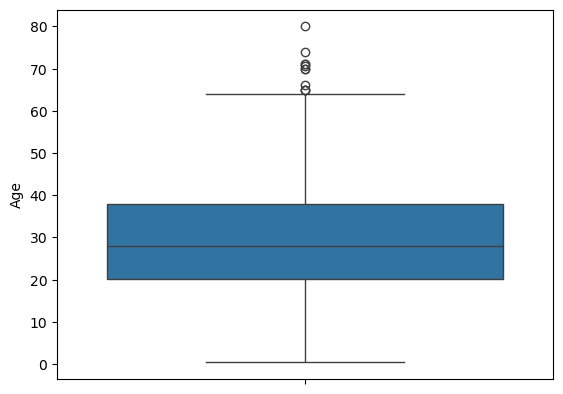

In [11]:
sns.boxplot(y=df.Age)

In [12]:
df.Age = df.Age.fillna(df.Age.mean())

<Axes: ylabel='Age'>

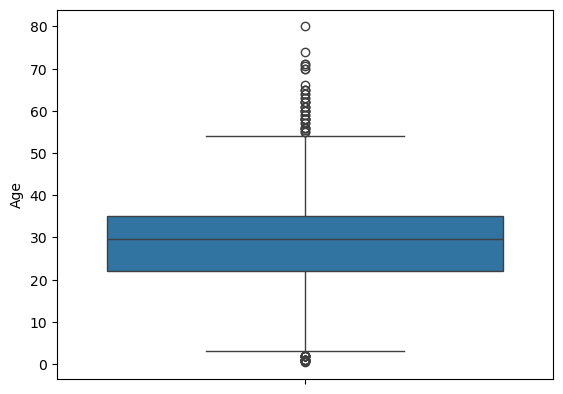

In [13]:
sns.boxplot(y=df.Age)

## Two passangers don't have the Embarked filled - we can drop these two rows

In [14]:
df = df.dropna().copy()

In [15]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,U,S
2,1,1,female,38.000000,1,0,71.2833,C,C
3,1,3,female,26.000000,0,0,7.9250,U,S
4,1,1,female,35.000000,1,0,53.1000,C,S
5,0,3,male,35.000000,0,0,8.0500,U,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,U,S
888,1,1,female,19.000000,0,0,30.0000,B,S
889,0,3,female,29.699118,1,2,23.4500,U,S


## The last step of the pre-processing pipeline is to encode Sex, Cabin and Embarked features
- We will use one-hot encoding for Sex and Embarked and Ordinal encoding for Cabin
- Specify the encoding scheme for the ordinal encoding using an array in a form ['first', 'second', 'third', ...]

In [16]:
cabin_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U']
enc_cabin = OrdinalEncoder(categories=[cabin_categories])
enc_cabin.fit_transform(df[['Cabin']])[:, 0]

array([7., 2., 7., 2., 7., 7., 4., 7., 7., 7., 6., 2., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 3., 7., 0., 7., 7., 7., 2., 7., 7., 7., 1., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 3., 7., 1., 2., 7., 7., 7., 7., 7., 2., 7., 7., 7., 5., 7., 7.,
       7., 7., 7., 7., 7., 7., 5., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 2., 7., 7., 7., 4., 7., 7., 7., 0., 3., 7., 7., 7., 7., 3.,
       7., 7., 7., 7., 7., 7., 7., 2., 7., 7., 7., 7., 7., 7., 7., 1., 7.,
       7., 7., 7., 4., 3., 7., 7., 7., 5., 7., 7., 7., 7., 7., 7., 7., 3.,
       2., 7., 1., 7., 7., 7., 7., 7., 7., 7., 7., 5., 7., 7., 2., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 4., 7., 7., 7., 1.,
       7., 7., 7., 0., 7., 7., 2., 7., 7., 7., 7., 7., 5., 7., 0., 7., 7.,
       7., 7., 7., 7., 7., 5., 1., 1., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       6., 7., 7., 7., 0., 7., 7., 7., 7., 7., 3., 7., 7., 3., 7., 7., 7.,
       7., 7., 2., 7., 7.

In [17]:
df['Cabin'] = enc_cabin.fit_transform(df[['Cabin']])[:, 0]

In [18]:
sex_categories = ['male', 'female']
enc_sex = OrdinalEncoder(categories=[sex_categories])
df['Sex'] = enc_sex.fit_transform(df[['Sex']])[:, 0]

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0.0,22.0,1,0,7.2500,7.0,S
2,1,1,1.0,38.0,1,0,71.2833,2.0,C
3,1,3,1.0,26.0,0,0,7.9250,7.0,S
4,1,1,1.0,35.0,1,0,53.1000,2.0,S
5,0,3,0.0,35.0,0,0,8.0500,7.0,S


In [20]:
pd.get_dummies(df['Embarked'], prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True
...,...,...,...
887,False,False,True
888,False,False,True
889,False,False,True


In [21]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1).drop('Embarked', axis=1)

## Now we have the data ready

In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,0.0,22.000000,1,0,7.2500,7.0,False,False,True
2,1,1,1.0,38.000000,1,0,71.2833,2.0,True,False,False
3,1,3,1.0,26.000000,0,0,7.9250,7.0,False,False,True
4,1,1,1.0,35.000000,1,0,53.1000,2.0,False,False,True
5,0,3,0.0,35.000000,0,0,8.0500,7.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,0.0,27.000000,0,0,13.0000,7.0,False,False,True
888,1,1,1.0,19.000000,0,0,30.0000,1.0,False,False,True
889,0,3,1.0,29.699118,1,2,23.4500,7.0,False,False,True


## Let's start with splitting the data into the input and output part
- Usually named as a *X* and *y* variables

In [23]:
X, y = df.loc[:, df.columns != 'Survived'], df.loc[:, 'Survived']

In [24]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,0.0,22.0,1,0,7.2500,7.0,False,False,True
2,1,1.0,38.0,1,0,71.2833,2.0,True,False,False
3,3,1.0,26.0,0,0,7.9250,7.0,False,False,True
4,1,1.0,35.0,1,0,53.1000,2.0,False,False,True
5,3,0.0,35.0,0,0,8.0500,7.0,False,False,True


In [25]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

## Lets continue with train test split process.
- Note that number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 10), (178, 10), (711,), (178,))

## Create the Decision tree classifier instance

In [27]:
clf = DecisionTreeClassifier()

### Use *fit()* method for training of classifier

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Lets use trained model for the prediction part
- Get predictions via the method *predict()*

In [29]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

### Can we evaluate our model?
- There are multiple metrics used: Accuracy, Recall, Precision, F1-Score, etc.
- Very useful is also creating a confusion matrix

### Take a look at this [article](https://builtin.com/data-science/precision-and-recall) and [wiki](https://en.wikipedia.org/wiki/Precision_and_recall) about precision and recall
- Beware the fact that as we increase precision, we decrease recall and vice-versa.

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate.

- **Recall** is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label?

- **F1 Score** is the harmonic mean of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, itâ€™s better to look at both Precision and Recall.

$ConfMatrix = \begin{bmatrix}
TP & FN\\
FP & TN
\end{bmatrix}$

In [30]:
accuracy_score(y_test, y_pred)

0.8202247191011236

## What does the confusion matrix tell us?
- Where do we find true positives, false positives etc?

<Axes: >

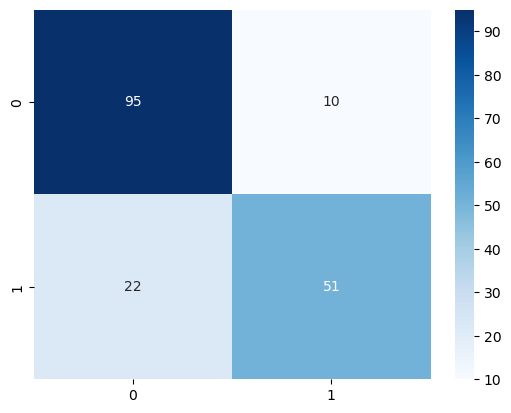

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")

In [32]:
confusion_matrix(y_test, y_pred)

array([[95, 10],
       [22, 51]], dtype=int64)

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(95, 10, 22, 51)

In [34]:
accuracy_score(y_test, y_pred)

0.8202247191011236

In [35]:
precision_score(y_test, y_pred)

0.8360655737704918

In [36]:
recall_score(y_test, y_pred)

0.6986301369863014

In [37]:
f1_score(y_test, y_pred)

0.7611940298507462

## Can we improve our evaluation process?
- Lets try crossvalidation process for decision tree model
- https://scikit-learn.org/stable/modules/cross_validation.html
- **What is the difference between Pure and Stratified K-Fold?**

In [38]:
skf = KFold(n_splits=5)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    print(f'Survival ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; Survival ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')
scores

Survival ratio in train set: 0.4; Survival ratio in test set: 0.33
Survival ratio in train set: 0.37; Survival ratio in test set: 0.44
Survival ratio in train set: 0.38; Survival ratio in test set: 0.39
Survival ratio in train set: 0.38; Survival ratio in test set: 0.4
Survival ratio in train set: 0.39; Survival ratio in test set: 0.35


[0.640625,
 0.7402597402597403,
 0.7285714285714285,
 0.6518518518518519,
 0.7727272727272727]

In [39]:
skf = StratifiedKFold(n_splits=5)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    print(f'Survival ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; Survival ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')
    
scores

Survival ratio in train set: 0.38; Survival ratio in test set: 0.38
Survival ratio in train set: 0.38; Survival ratio in test set: 0.38
Survival ratio in train set: 0.38; Survival ratio in test set: 0.38
Survival ratio in train set: 0.38; Survival ratio in test set: 0.38
Survival ratio in train set: 0.38; Survival ratio in test set: 0.38


[0.7,
 0.7246376811594203,
 0.7424242424242424,
 0.6923076923076923,
 0.7801418439716312]

In [40]:
np.mean(scores), np.min(scores), np.max(scores)

(0.7279022919725973, 0.6923076923076923, 0.7801418439716312)

In [41]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
scores = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    
scores

[0.7172413793103448,
 0.6666666666666666,
 0.732824427480916,
 0.7482014388489209,
 0.6666666666666666]

In [42]:
np.mean(scores), np.min(scores), np.max(scores)

(0.706320115794703, 0.6666666666666666, 0.7482014388489209)

## Other way to use crossvalidation in Sklearn

In [43]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
scores

array([0.68085106, 0.71428571, 0.75555556, 0.6875    , 0.78571429])

In [44]:
np.mean(scores), np.min(scores), np.max(scores)

(0.7247813238770686, 0.6808510638297872, 0.7857142857142857)

## Scale our data

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

In [46]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='f1')
scores

array([0.67153285, 0.72992701, 0.76119403, 0.70149254, 0.79432624])

In [47]:
np.mean(scores), np.min(scores), np.max(scores)

(0.731694532462706, 0.6715328467153284, 0.7943262411347518)

# Let's try other algorithms - SVM and ANN
- SVM - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- SVM demo 1 - https://www.csie.ntu.edu.tw/~cjlin/libsvm/
- SVM demo 2 - https://cs.stanford.edu/~karpathy/svmjs/demo/
- SVM kernel trick https://towardsdatascience.com/optimization-loss-function-under-the-hood-part-iii-5dff33fa015d
- ANN - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
- ANN demo - https://playground.tensorflow.org/

### Task 1: SVM (1b)
- Take a look at the parameters of the SVM, e.g. C, kernel, gamma (in case of RBF)
- **Try at least 5 different parameter's configurations**, use both linear and RBF kernel, you can also experiment with other
- **Does the preprocesing help with classifier perfromance?** Use both **X** and **X_scaled** for training and evaluating
- Tune the hyper-parameters and compare classification results after crossvalidation validation step
    - When using RBF kernel show a relation between parameters C and gamma. You can create table or heatmap similar to the one in the lecture.
    - **Write down to markdown cell which is better and why!**
- *Implementation note in Sklearn: SVC(kernel='linear') might be slow, u can use LinearSVC instead.*

# SVC Not scaled data

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000, 100000],          # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],  # Kernel coefficient
    'kernel': ['rbf']                 # Using RBF kernel
}
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

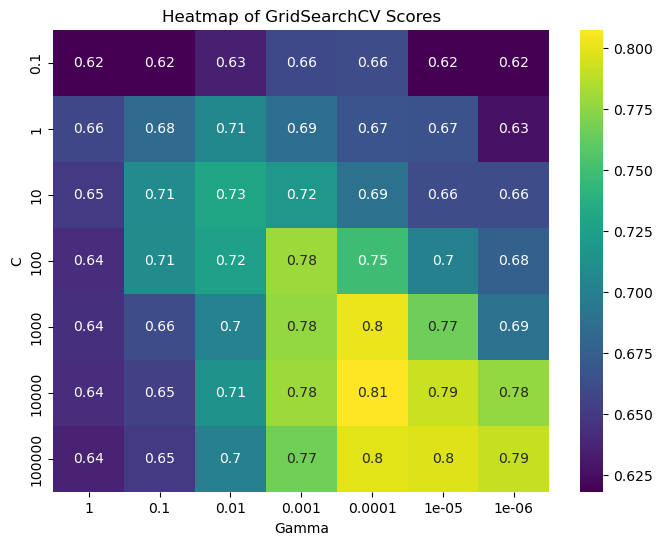

In [54]:
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Heatmap of GridSearchCV Scores')
plt.show()

# SVC Scaled data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((711, 10), (178, 10), (711,), (178,))

In [56]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000, 100000],          # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],  # Kernel coefficient
    'kernel': ['rbf']                 # Using RBF kernel
}

# Initialize an SVM model
svc = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

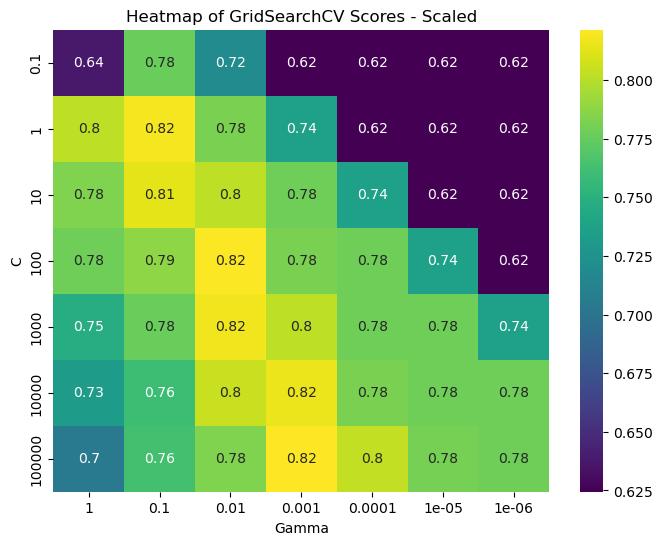

In [57]:
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Heatmap of GridSearchCV Scores - Scaled')
plt.show()

# Linear kernel for SVC, scaled data

In [59]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],          # Regularization parameter
    'kernel': ['linear']                 # Using Linear kernel
}

# Initialize an SVM model
svc = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, ke

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             scoring='accuracy', verbose=2)

[0.77777012 0.78056732 0.78056732 0.78056732 0.78056732]


<Axes: >

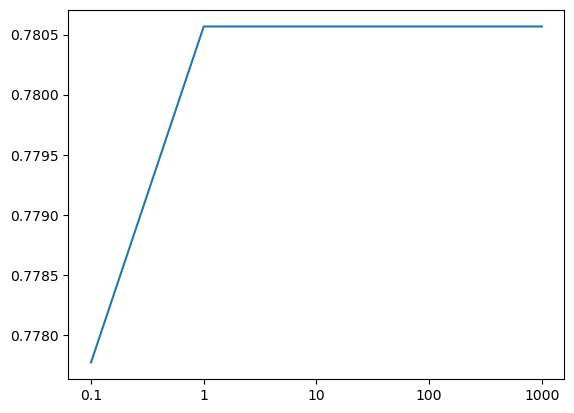

In [64]:
C = ['0.1', '1', '10', '100', '1000']
scores = grid_search.cv_results_['mean_test_score']
print(scores)
sns.lineplot(x = C, y=scores)

# SVC Vyhodnocení hyperparametrů
Začnu rovnou otázkou, zda-li scaling dat pomáhá a odpověď je difinitivně **ANO**. SVM oproti DecisionTree se snaží vytvořit matematickou funkci ve formě lineárního vektoru (Pro linear kernel) a taky nastavuje bounds toho vektoru, takže to v jakém rozmezí hodnoty jsou a jak velké jsou dělá rozdíl. (Oproti Decision Tree, který jenom pevně nastavuje hranice)  
  
Dále bych se chtěl pozastavit nad linear vs rbf kernel, můžeme vidět, že rbf kernel dosažuje lepší accuracy, a to protože má větší volnost co se týče nastavení rozdělovacího vektoru a jeho bounds (není omezen linearitou).  
  
Potom se ještě můžeme kouknout na porovnání zvyšujícího C a snižující se gammy. Dobré accuracy dosahujeme už při C = 1 a gamma = 0.1, podobná accuracy potom následuje pro C = 100 a gamma = 0.01.  
C je cost of misclassification, takže čím větší C, tím menší bude bias a větší bude variance, jelikož penalizujeme více "striktně". Gamma potom je inverze radiusu vlivu, takže čím menší máme gammu, tím větší radius jednotlivé třídy budou mít.  

Nejlepší v tomto případě je **balanc** mezi C a gammou.

### Task 2: NN (1b)
- Take a look at the parameters of the MLPClassifier, e.g. hidden_layer_sizes, activation, solver, max_iter
- Tune the hyper-parameters and compare the ANN model proposed during the lecture
    - Choose the ideal form of presentation for hyperparameter tuning results (e.g. table with scores, plot showing the score relation to some parameter, etc.)
    - **Write down to markdown cell which is better and why!**

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Various layer sizes and counts
    'activation': ['relu', 'tanh', 'logistic'],                  # Activation functions
    'solver': ['adam', 'sgd'],                                   # Optimizers
    'max_iter': [200, 400, 600]                                  # Different max iterations
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   3.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   1.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   1.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   1.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   1.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   1.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   1.0s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   2.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   2.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   2.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   0.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   0.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.0s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   3.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   2.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   3.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   3.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   2.9s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   2.9s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   2.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   3.2s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   1.9s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   3.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   3.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   2.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   2.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   2.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   2.7s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   2.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   4.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   4.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   4.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   5.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   4.9s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   3.2s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   2.4s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   2.5s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   2.6s
[CV] END activation=relu, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   2.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   2.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   2.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   2.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   2.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   2.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   4.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   4.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   4.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   4.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   4.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   3.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   5.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   4.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   3.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   8.5s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   5.8s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   6.4s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   6.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   4.0s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=(100, 100), max_iter=600, solver

e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   1.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   2.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   2.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   2.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   0.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   2.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   2.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   2.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   3.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   3.5s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   0.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   2.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   1.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   3.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   4.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   4.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   3.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   4.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   1.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   3.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   3.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   3.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   3.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   3.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   1.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   4.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   4.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   5.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   5.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   5.2s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   1.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.6s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   1.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   5.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   5.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   5.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   5.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   5.6s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   1.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   8.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   8.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=  10.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   8.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   8.4s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   1.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=adam; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=adam

e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=200, solver=sgd; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=adam; total time=   0.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   1.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   1.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   1.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   1.8s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=400, solver=sgd; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   0.7s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   0.8s
[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=adam; total time=   0.7s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   2.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   2.3s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   2.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50,), max_iter=600, solver=sgd; total time=   2.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=adam; total time=   2.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=200, solver=sgd; total time=   1.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=adam; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   3.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   3.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   3.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   2.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=400, solver=sgd; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   1.0s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   0.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   1.1s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   1.2s
[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=adam; total time=   0.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   2.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   3.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   3.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   2.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), max_iter=600, solver=sgd; total time=   3.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   2.1s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.6s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=adam; total time=   1.4s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=200, solver=sgd; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   2.1s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   2.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   2.8s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   1.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=adam; total time=   2.8s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=400, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   2.9s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   4.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   1.5s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=adam; total time=   4.9s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   0.4s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(50, 50), max_iter=600, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   1.6s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.4s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   1.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=adam; total time=   2.3s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=200, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   1.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   4.7s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   2.0s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=adam; total time=   4.8s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=400, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   1.4s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   7.7s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   1.9s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=adam; total time=   7.1s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   0.2s
[CV] END activation=logistic, hidden_layer_sizes=(100, 100), max_iter=600, solver=sgd; total time=   0.2s


e:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 100)],
                         'max_iter': [200, 400, 600],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy', verbose=2)

In [53]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'max_iter': 200,
 'solver': 'adam'}

In [54]:
grid_search.best_score_

0.8227912932138285

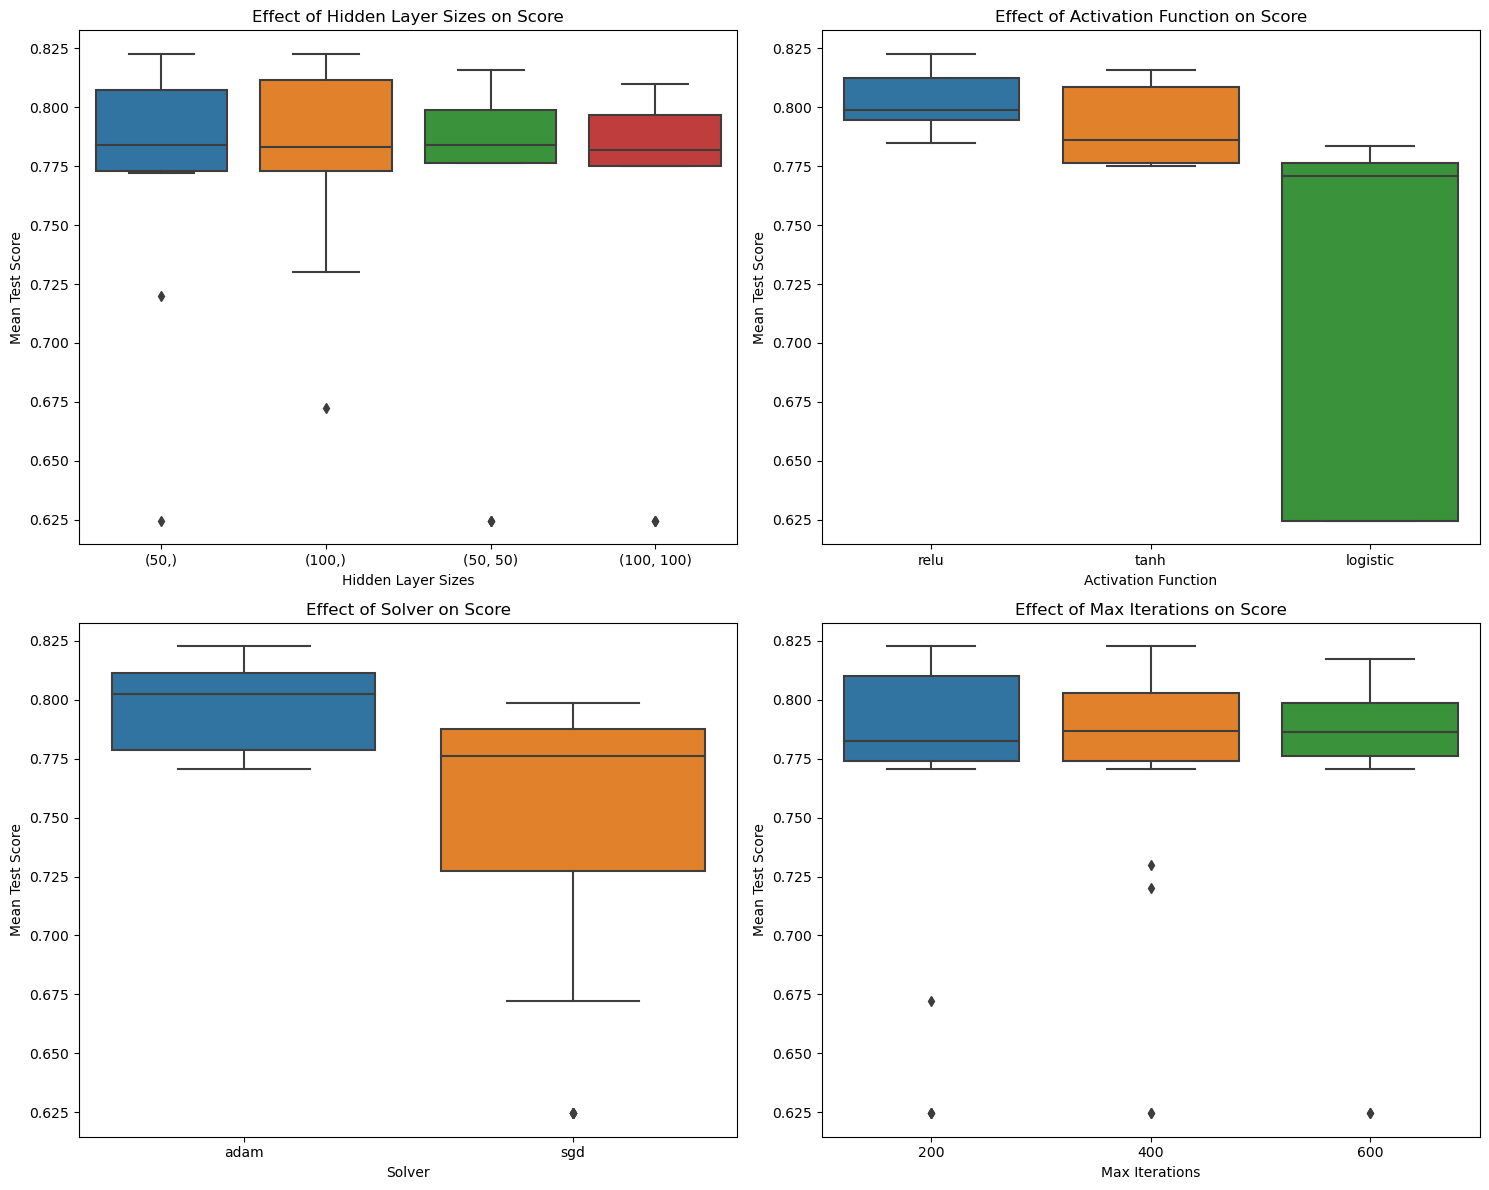

In [52]:
# Convert cv_results_ to a DataFrame for easier plotting
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot the effect of each hyperparameter on score
plt.figure(figsize=(15, 12))

# Plot hidden_layer_sizes vs score
plt.subplot(2, 2, 1)
sns.boxplot(x='param_hidden_layer_sizes', y='mean_test_score', data=results_df)
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Test Score')
plt.title('Effect of Hidden Layer Sizes on Score')

# Plot activation function vs score
plt.subplot(2, 2, 2)
sns.boxplot(x='param_activation', y='mean_test_score', data=results_df)
plt.xlabel('Activation Function')
plt.ylabel('Mean Test Score')
plt.title('Effect of Activation Function on Score')

# Plot solver vs score
plt.subplot(2, 2, 3)
sns.boxplot(x='param_solver', y='mean_test_score', data=results_df)
plt.xlabel('Solver')
plt.ylabel('Mean Test Score')
plt.title('Effect of Solver on Score')

# Plot max_iter vs score
plt.subplot(2, 2, 4)
sns.boxplot(x='param_max_iter', y='mean_test_score', data=results_df)
plt.xlabel('Max Iterations')
plt.ylabel('Mean Test Score')
plt.title('Effect of Max Iterations on Score')

plt.tight_layout()
plt.show()

# Zhodnocení hypertuningu ANN
Nejlepší parametry byly: Jedna hidden layer of velikosti 100, aktivační funkce relu, adam optimizer a 200 max iterations.  
- Můžeme si všimnout, že jenom jedna hidden layer měla lepší accuracy oproti dvoum, nezávisle na velikosti.  
- Co se týče aktivační funkce, tak jednoznačně relu vedla nad tanh a logistic funkcemi.  
- Adam jakožto Solver měl lepší performance než sgd.  
- Co se týče max iterations, tak tam nijak zásadní rozdíly nejsou, 200 iterations má menší medián než 400 a 600, ale zase měla větší 3tí kvantil.  

### Bonus task: OPTUNA (1b)
Use **Optuna** library for hyperparameter tuning process for one of previous classification methods (SVM, ANN).

A short list with some materials for this task:
- Hyperparameter tuning blog 1 https://medium.com/@iqra.bismi/hyper-parameter-tuning-of-machine-learning-models-using-optuna-f1905547937f
- Hyperparameter tuning blog 2 https://medium.com/@abdalrahman_shahrour/optuna-vs-gridsearch-57227556c450
- https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html
- https://github.com/optuna/optuna
- https://github.com/optuna/optuna-dashboard and https://optuna.github.io/optuna-dashboard/

**What is the difference in using the Optuna instead of grid search?**

In [49]:
import optuna

In [54]:
# In optuna we need to create some function that we will call each trial 
def objective(trial):
    # Params we will test
    hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(50), (100), (50, 50), (100, 100)])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "logistic"])
    solver = trial.suggest_categorical("solver", ["adam", "sgd"])
    max_iter = trial.suggest_int("max_iter", 200, 600, step=200)
    
    # Model
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )
    
    scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='accuracy')
    # trial function needs to return score
    return scores.mean()

# Then we create optuna study and we specify if we want to maximize score or minimize
study = optuna.create_study(direction="maximize")
# Total of 50 trials will be done?
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Best hyperparameters
print("Best trial:")
print(f"Value: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

# Train the final model with the best parameters
best_params = study.best_trial.params
final_model = MLPClassifier(
    hidden_layer_sizes=best_params["hidden_layer_sizes"],
    activation=best_params["activation"],
    solver=best_params["solver"],
    max_iter=best_params["max_iter"],
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate on the test set
test_score = final_model.score(X_test, y_test)
print(f"Test set accuracy: {test_score:.4f}")

[I 2024-11-20 20:06:13,850] A new study created in memory with name: no-name-06c194d8-b35e-4192-8e42-cf8293b8622f


  0%|          | 0/50 [00:00<?, ?it/s]

d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)


[I 2024-11-20 20:06:17,324] Trial 0 finished with value: 0.7763124199743918 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'max_iter': 600}. Best is trial 0 with value: 0.7763124199743918.


d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_n

[I 2024-11-20 20:06:21,465] Trial 1 finished with value: 0.7847926721166159 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}. Best is trial 1 with value: 0.7847926721166159.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:06:27,378] Trial 2 finished with value: 0.720112282084113 and parameters: {'hidden_layer_sizes': 50, 'activation': 'logistic', 'solver': 'sgd', 'max_iter': 400}. Best is trial 1 with value: 0.7847926721166159.
[I 2024-11-20 20:06:31,658] Trial 3 finished with value: 0.7763124199743918 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'max_iter': 600}. Best is trial 1 with value: 0.7847926721166159.


d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_n

[I 2024-11-20 20:06:39,739] Trial 4 finished with value: 0.8086870875603271 and parameters: {'hidden_layer_sizes': 50, 'activation': 'tanh', 'solver': 'adam', 'max_iter': 400}. Best is trial 4 with value: 0.8086870875603271.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:06:48,253] Trial 5 finished with value: 0.8143208903772283 and parameters: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'solver': 'adam', 'max_iter': 400}. Best is trial 5 with value: 0.8143208903772283.
[I 2024-11-20 20:06:54,295] Trial 6 finished with value: 0.7791588692997143 and parameters: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'solver': 'sgd', 'max_iter': 600}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)


[I 2024-11-20 20:07:00,421] Trial 7 finished with value: 0.7960208805279227 and parameters: {'hidden_layer_sizes': 50, 'activation': 'relu', 'solver': 'sgd', 'max_iter': 400}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_n

[I 2024-11-20 20:07:10,353] Trial 8 finished with value: 0.7861715749039693 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}. Best is trial 5 with value: 0.8143208903772283.
[I 2024-11-20 20:07:16,095] Trial 9 finished with value: 0.7763124199743918 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'tanh', 'solver': 'sgd', 'max_iter': 400}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)


[I 2024-11-20 20:07:20,546] Trial 10 finished with value: 0.7707081650743622 and parameters: {'hidden_layer_sizes': 100, 'activation': 'logistic', 'solver': 'adam', 'max_iter': 200}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_n

[I 2024-11-20 20:07:27,271] Trial 11 finished with value: 0.8086870875603271 and parameters: {'hidden_layer_sizes': 50, 'activation': 'tanh', 'solver': 'adam', 'max_iter': 400}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:07:37,754] Trial 12 finished with value: 0.8143208903772283 and parameters: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'solver': 'adam', 'max_iter': 400}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:07:48,427] Trial 13 finished with value: 0.8143208903772283 and parameters: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'solver': 'adam', 'max_iter': 400}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:08:06,022] Trial 14 finished with value: 0.8115335368856496 and parameters: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'solver': 'adam', 'max_iter': 600}. Best is trial 5 with value: 0.8143208903772283.
[I 2024-11-20 20:08:10,510] Trial 15 finished with value: 0.7707081650743622 and parameters: {'hidden_layer_sizes': 100, 'activation': 'logistic', 'solver': 'adam', 'max_iter': 200}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_n

[I 2024-11-20 20:08:26,373] Trial 16 finished with value: 0.8087067861715749 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'tanh', 'solver': 'adam', 'max_iter': 400}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:08:41,073] Trial 17 finished with value: 0.8115335368856496 and parameters: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'solver': 'adam', 'max_iter': 600}. Best is trial 5 with value: 0.8143208903772283.
[I 2024-11-20 20:08:44,911] Trial 18 finished with value: 0.7707081650743622 and parameters: {'hidden_layer_sizes': 100, 'activation': 'logistic', 'solver': 'adam', 'max_iter': 400}. Best is trial 5 with value: 0.8143208903772283.


d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_n

[I 2024-11-20 20:08:48,737] Trial 19 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:08:56,337] Trial 20 finished with value: 0.8101349354870482 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:01,089] Trial 21 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:05,960] Trial 22 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:11,282] Trial 23 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:16,787] Trial 24 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:20,557] Trial 25 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:24,714] Trial 26 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:28,565] Trial 27 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:35,738] Trial 28 finished with value: 0.8101349354870482 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:40,366] Trial 29 finished with value: 0.8115335368856496 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:44,619] Trial 30 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:49,072] Trial 31 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:53,025] Trial 32 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:09:56,773] Trial 33 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:03,175] Trial 34 finished with value: 0.8115335368856496 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:07,864] Trial 35 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:13,413] Trial 36 finished with value: 0.7918053777208707 and parameters: {'hidden_layer_sizes': 50, 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:19,540] Trial 37 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:24,111] Trial 38 finished with value: 0.6722742046685709 and parameters: {'hidden_layer_sizes': 100, 'activation': 'logistic', 'solver': 'sgd', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:27,610] Trial 39 finished with value: 0.821382842509603 and parameters: {'hidden_layer_sizes': 50, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:32,632] Trial 40 finished with value: 0.7847926721166159 and parameters: {'hidden_layer_sizes': (50, 50), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:37,325] Trial 41 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:41,674] Trial 42 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:45,293] Trial 43 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:48,921] Trial 44 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:10:52,742] Trial 45 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:11:07,497] Trial 46 finished with value: 0.80169408056732 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'adam', 'max_iter': 400}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:11:11,912] Trial 47 finished with value: 0.6722742046685709 and parameters: {'hidden_layer_sizes': 100, 'activation': 'logistic', 'solver': 'sgd', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:11:19,231] Trial 48 finished with value: 0.8227617452969564 and parameters: {'hidden_layer_sizes': 50, 'activation': 'relu', 'solver': 'adam', 'max_iter': 400}. Best is trial 19 with value: 0.8227912932138285.


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer

[I 2024-11-20 20:11:23,158] Trial 49 finished with value: 0.8227912932138285 and parameters: {'hidden_layer_sizes': 100, 'activation': 'relu', 'solver': 'adam', 'max_iter': 200}. Best is trial 19 with value: 0.8227912932138285.
Best trial:
Value: 0.8227912932138285
Params:
  hidden_layer_sizes: 100
  activation: relu
  solver: adam
  max_iter: 200
Test set accuracy: 0.8315


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Rozdíl mezi Optunou a GridSearchCV

Nejvíce patrný rozdíl mi přijde v tom, že optuna pro hypertuning parametrů potřebuje funkci která se pak volá každý trial. Tím je více náročnější na rozjetí from scratch oproti GridSearchi, ale zase na druhou stranu dává větší volnost a větší možnost úprav, které by programátor mohl potřebovat.